In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

When an agent has positive opinion (+1) it will drop connections with his friends at epidemic layer. He will protect himself by isolating from others by removing $ X \sim U(0, len(neighbours))$ links. 

The results for larger network, i.e. 100k nodes are similar to 10k. Thus, I decided to run simulations on smaller system.


```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 10000
nRuns: 1
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 1.0
  q: 6
epidemicLayerParameters:
  beta: 0.9
  gamma: 0.5
  mu: 0.8
  kappa: 0.2
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 0.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/test_removal_links_on
firstParameterRange:
  start: 0.0
  end: 0.4
  count: 3
  vals: [ 0.1, 0.5, 0.9 ]
  type: p
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 3
  vals: [ 0.1, 0.9 ]
  type: positiveOpinionFraction
linksRemoval: true
nQVoterPerStep: 1
```


In [24]:
def load_df(p, fracPos, folder='test_removal_links_off', nagents=10000, nsteps=1000000):
    path = f"../simulations/{folder}/_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_EPIDEMIC=beta=0.90_gamma=0.50_mu=0.80_kappa=0.20_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")


p01_f01_off = load_df('0.10', 0.1)
p01_f09_off = load_df('0.10', 0.9)

p01_f01_on = load_df('0.10', 0.1, folder='test_removal_links_on')
p01_f09_on = load_df('0.10', 0.9, folder='test_removal_links_on')

p05_f01_off = load_df('0.50', 0.1)
p05_f09_off = load_df('0.50', 0.9)

p05_f01_on = load_df('0.50', 0.1, folder='test_removal_links_on')
p05_f09_on = load_df('0.50', 0.9, folder='test_removal_links_on')

p09_f01_off = load_df('0.90', 0.1)
p09_f09_off = load_df('0.90', 0.9)

p09_f01_on = load_df('0.90', 0.1, folder='test_removal_links_on')
p09_f09_on = load_df('0.90', 0.9, folder='test_removal_links_on')

In [25]:
colors = ['red', 'green', 'blue', 'orange', 'black', 'violet']
colors = ['xkcd:' + c for c in colors]

def print_run(dfs, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), title=''):
    for i, df in enumerate(dfs):
        plt.plot(df.step / 10000, df[col], label=fr'{labels[i]}', color=colors[i])
    plt.xlabel("time")
    plt.ylim(*ylim)
    plt.xlim(*xlim)

def plot_per_metric(p01, p05, p09, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), ylog=False):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 3, 1)
    print_run(p01, labels, col, ylim, xlim)
    plt.ylabel(col)
    plt.title('p=0.1')
    if ylog:
        plt.yscale('log')

    plt.subplot(1, 3, 2)
    print_run(p05, labels, col, ylim, xlim)
    plt.title('p=0.5')
    plt.legend()    
    if ylog:
        plt.yscale('log')
        
    plt.subplot(1, 3, 3)
    print_run(p09, labels, col, ylim, xlim)
    plt.title('p=0.9')
    if ylog:
        plt.yscale('log')


p01 = [p01_f01_off, p01_f09_off, p01_f01_on, p01_f09_on]
p05 = [p05_f01_off, p05_f09_off, p05_f01_on, p05_f09_on]
p09 = [p09_f01_off, p09_f09_off, p09_f01_on, p09_f09_on]
labels = ['fracPos = 0.1 (off)', 'fracPos = 0.9 (off)', 'fracPos = 0.1 (on)', 'fracPos = 0.9 (on)']    

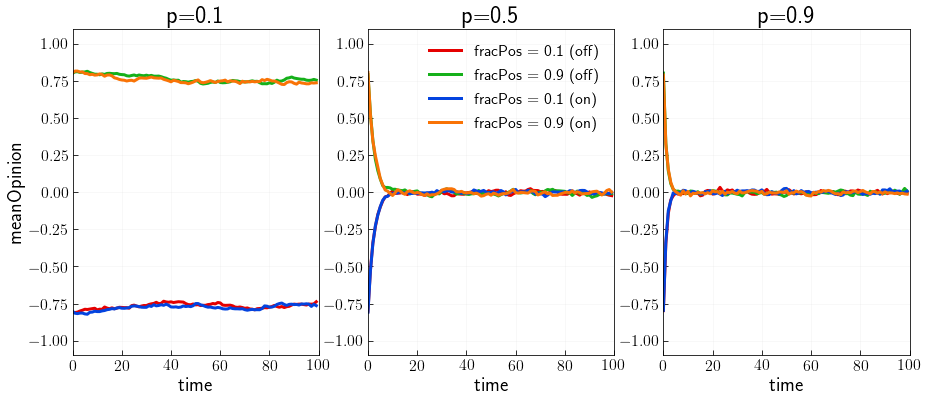

In [26]:
plot_per_metric(p01, p05, p09, labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100))

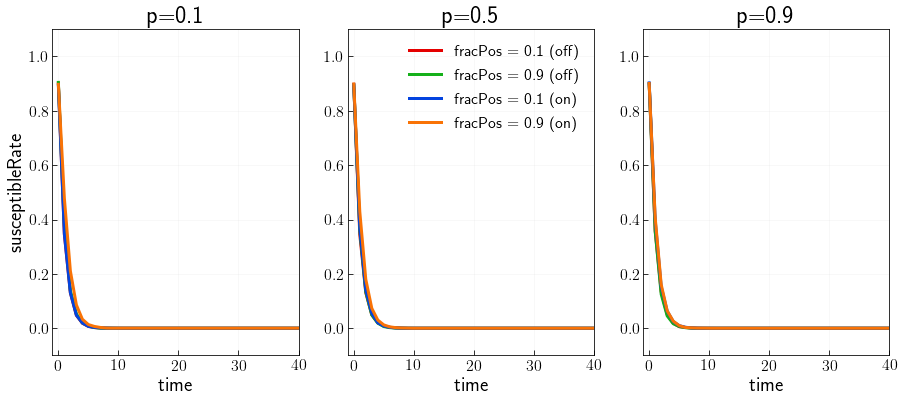

In [27]:
plot_per_metric(p01, p05, p09, labels, 'susceptibleRate')

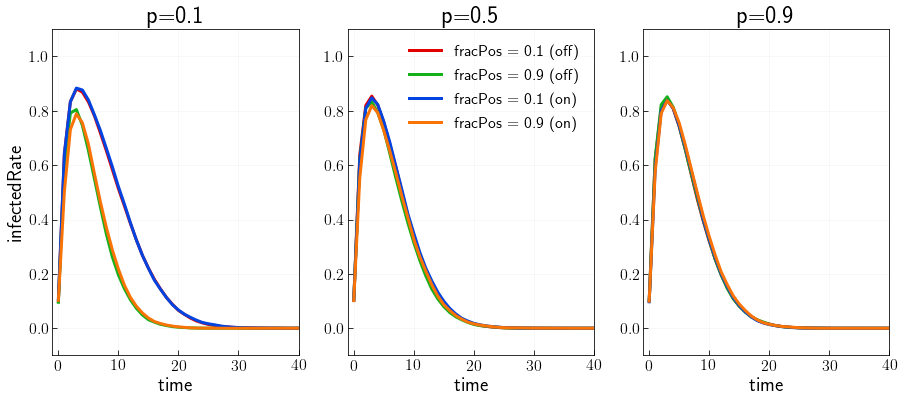

In [28]:
plot_per_metric(p01, p05, p09, labels, 'infectedRate')

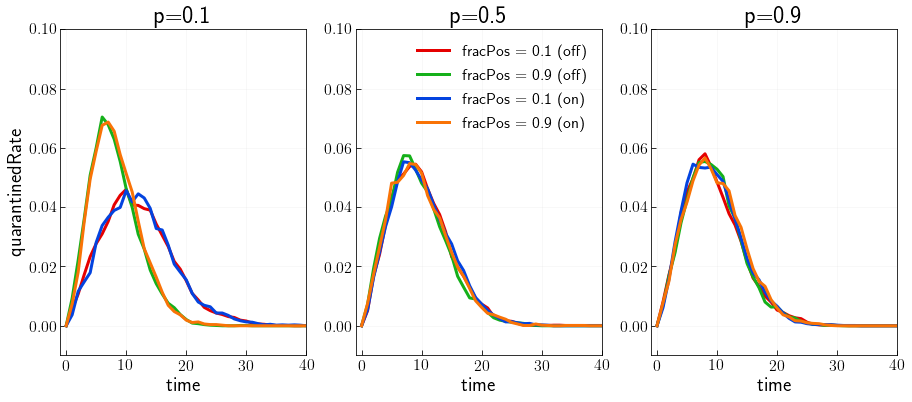

In [29]:
plot_per_metric(p01, p05, p09, labels, 'quarantinedRate', ylim=(-0.01, 0.1))

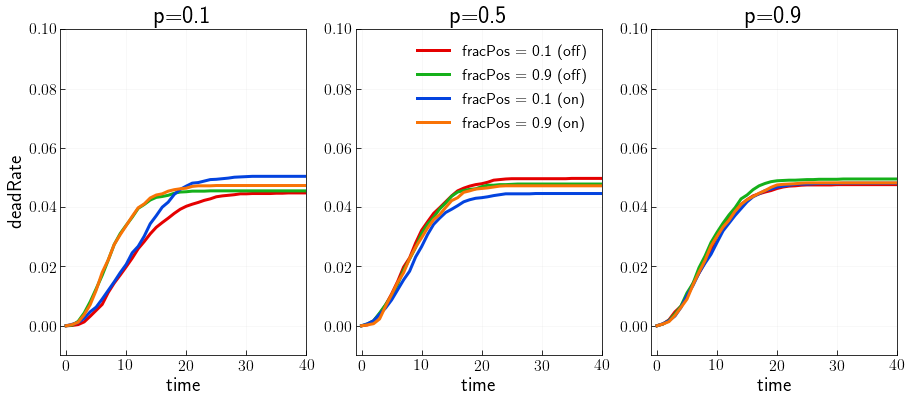

In [30]:
plot_per_metric(p01, p05, p09, labels, 'deadRate', ylim=(-0.01, 0.1))

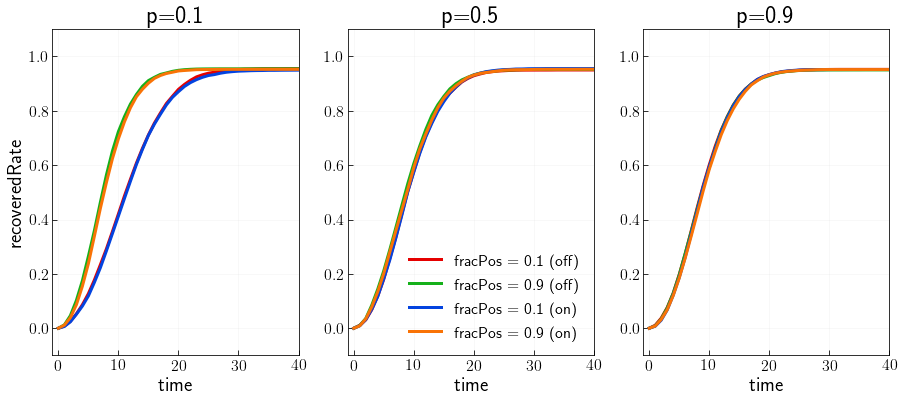

In [31]:
plot_per_metric(p01, p05, p09, labels, 'recoveredRate')

In [32]:
def load_df_last(ps, folder, ntimes=5, beta='0.90'):
    x = []
    for p in ps:
        x_tmp = []
        for n in range(ntimes):
            path = f'../simulations/{folder}/_NAGENTS=10000_NSTEPS=1000000_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION=1.0_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_EPIDEMIC=beta={beta}_gamma=0.50_mu=0.80_kappa=0.20_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN={n}.tsv'
            df = pd.read_csv(path, sep='\t')
            x_tmp.append(df.meanOpinion.values[-1])
        x.append(np.mean(x_tmp))
    return x
        
ps = [f'{x:.2f}' for x in np.linspace(0, 0.3, 50)]

x_off = load_df_last(ps, 'test_removal_links_off_phase_transition')
x_on = load_df_last(ps, 'test_removal_links_on_phase_transition')        
x_on_low_beta = load_df_last(ps, 'test_removal_links_on_phase_transition_low_beta', beta='0.10')

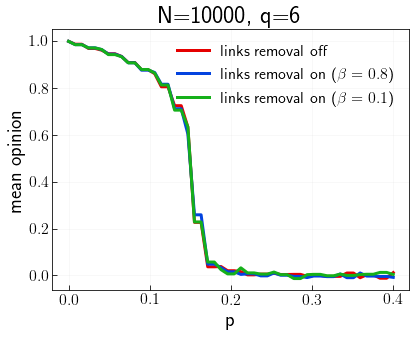

In [33]:
ps = np.linspace(0, 0.4, 50)
plt.plot(ps, x_off, label='links removal off', color='xkcd:red')
plt.plot(ps, x_on, label=r'links removal on ($\beta=0.8$)', color='xkcd:blue')
plt.plot(ps, x_on_low_beta, label=r'links removal on ($\beta=0.1$)', color='xkcd:green')

plt.xlabel('p')
plt.ylabel('mean opinion')
plt.title('N=10000, q=6')
plt.legend(loc='upper right')
plt.show()